In [1]:
#MODEL: ARTIFICIAL NEURAL NETWORK(ANN)
#       LSTM
#       MICROSOFT CLOSING PRICE (PAST 7 DAYS STOCK PRICE)


In [2]:
# LIBRARIES
import tensorflow_estimator
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn. preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use( 'fivethirtyeight')

In [ ]:
%pip install --upgrade pandas-datareader

In [4]:
import pandas_datareader
pandas_datareader.__version__  # Should show 0.10.0

'0.10.0'

In [5]:
#DATASETS

df = web.DataReader('MSFT', data_source='av-intraday', start='2023-04-21', end='2023-04-28', api_key='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=368NI7SFVG4K4RL0')
df


,open,high,low,close,volume
2023-04-21 04:04:00,286.48,286.48,286.46,286.46,445
2023-04-21 04:06:00,286.32,286.32,286.32,286.32,535
2023-04-21 04:07:00,286.45,286.45,286.27,286.27,546
2023-04-21 04:20:00,286.33,286.33,286.33,286.33,188
2023-04-21 04:28:00,286.40,286.40,286.40,286.40,104
...,...,...,...,...,...
2023-04-27 19:53:00,304.50,304.51,304.50,304.51,1398
2023-04-27 19:54:00,304.40,304.73,304.40,304.73,2153
2023-04-27 19:55:00,304.61,304.61,304.50,304.50,1183
2023-04-27 19:59:00,304.64,304.64,304.64,304.64,183


In [6]:
#ROWS AND COLS
df.shape

(3571, 5)

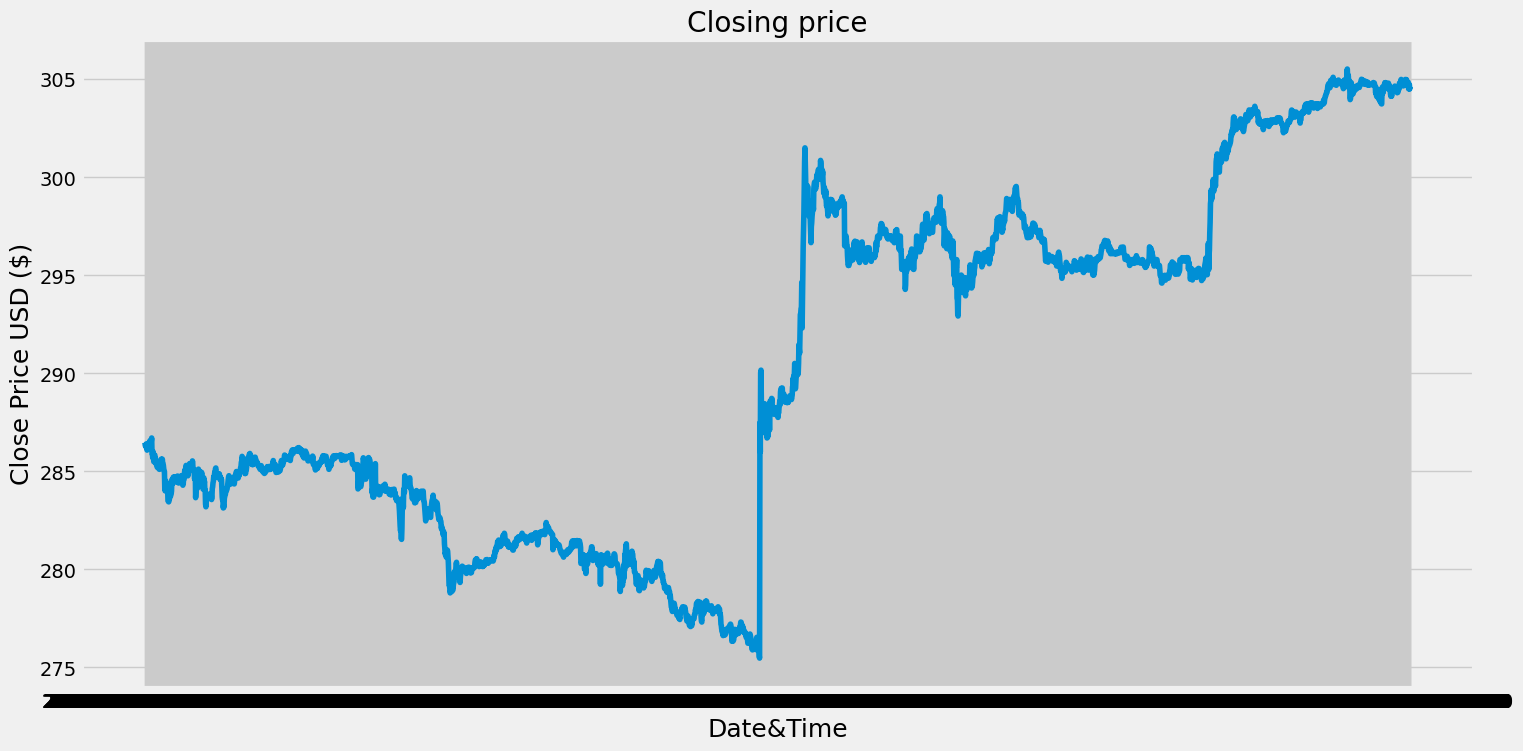

In [7]:
#PLOTTING CLOSING PRICE
plt.figure(figsize=(16,8))
plt.title('Closing price')
plt.plot(df['close'])

plt.xlabel('Date&Time', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.savefig('D:\programing\year 2 project\static\css\image\plot.png')
plt.show()

In [8]:
#CLOSE COL
data = df.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2857

In [9]:
#SCALE THE DATA FOR HELPING THE MODEL 0 AND 1 INCLUSIVE
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.36572379],
       [0.36106489],
       [0.359401  ],
       ...,
       [0.96605657],
       [0.97071547],
       [0.97071547]])

In [10]:
#CREATE TRAINING DATASET
#CREATE THE SCALED TRAINING DATASET
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(3360, len(train_data)):
  x_train.append(train_data[i-3360:i,0 ]) # doesnot include i
  y_train.append(train_data[i, 0])
  if i <= 3361:                       #changed (increased 1 up)
    print(x_train)
    print(y_train)
    print()

In [11]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


0


In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

IndexError: tuple index out of range

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model. add(Dense(25)) 
model.add(Dense(1))

ValueError: Exception encountered when calling layer "lstm" (type LSTM).

slice index 0 of dimension 0 out of bounds. for '{{node strided_slice_1}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](transpose, strided_slice_1/stack, strided_slice_1/stack_1, strided_slice_1/stack_2)' with input shapes: [0,?,1], [1], [1], [1] and with computed input tensors: input[1] = <0>, input[2] = <1>, input[3] = <1>.

Call arguments received by layer "lstm" (type LSTM):
  • inputs=tf.Tensor(shape=(None, 0, 1), dtype=float32)
  • mask=None
  • training=None
  • initial_state=None

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
 #Train the model
model. fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Create the testing data set
#Create a new array containing scaled values 
test_data = scaled_data[training_data_len - 3360: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(3360, len(test_data)):
  x_test.append(test_data[i-3360:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

37/37 [==============================] - 53s 1s/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1.3543863498587103

C:\Users\alist\AppData\Local\Temp\ipykernel_23300\1293321140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


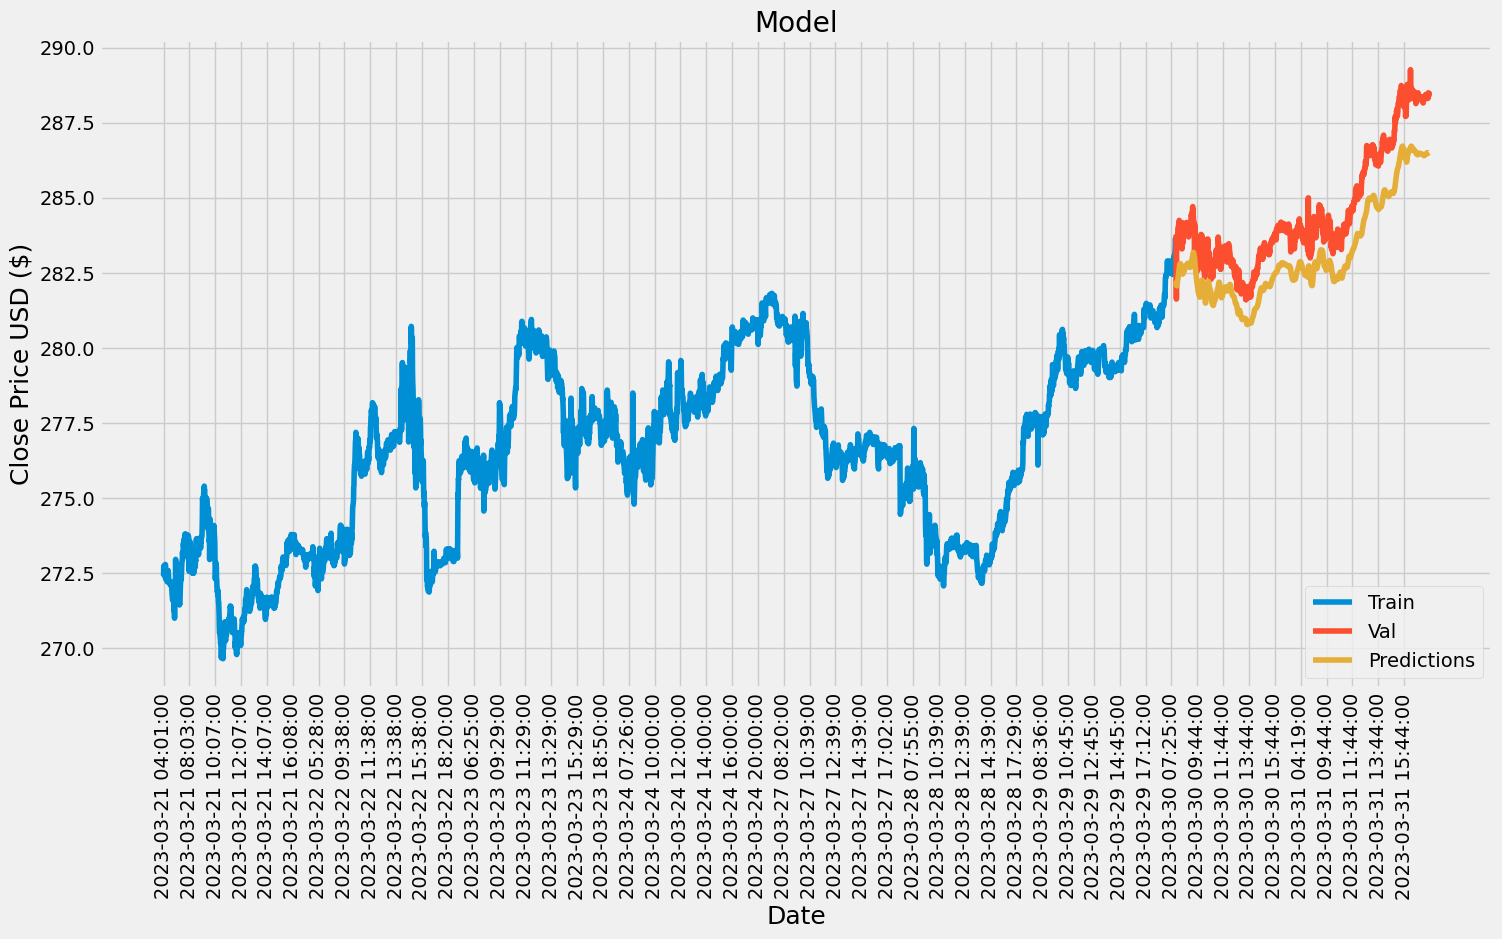

In [ ]:
#PLOT
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel ('Close Price USD ($)', fontsize=18)
plt.plot(train[ 'close' ])
plt.plot(valid[['close', 'Predictions']])
plt.xticks(range(0, len(df.index), 120), df.index[0::120], rotation=90)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('D:\programing\year 2 project\static\css\image\plot1.png')
plt.show()

In [ ]:
# actual and predicted data
valid

,close,Predictions
2023-03-30 08:01:00,283.78,282.103882
2023-03-30 08:02:00,281.63,282.174866
2023-03-30 08:03:00,283.70,282.075806
2023-03-30 08:04:00,283.71,282.069458
2023-03-30 08:05:00,283.70,282.101166
...,...,...
2023-03-31 19:44:00,288.33,286.495148
2023-03-31 19:53:00,288.50,286.492249
2023-03-31 19:54:00,288.40,286.501740
2023-03-31 19:55:00,288.40,286.507660


In [ ]:
#FORCAST
MSFT_quote = web.DataReader('MSFT', data_source='av-intraday', start='2023-03-21', end='2023-04-03', api_key='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=368NI7SFVG4K4RL0')
#Create a new dataframe
new_df = MSFT_quote. filter(['close'])
#Geting last 7 day closing price values and converting the dataframe to an array
last_07_days = new_df[-3360:].values
#Scale the data to be values between 0 and 1
last_07_days_scaled = scaler.transform(last_07_days)
#Create an empty list
X_test = []
#Append past 07 days
X_test.append(last_07_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 1s 1s/step
[[280.52994]]


In [ ]:
MSFT_quote02 = web.DataReader('MSFT', data_source='av-intraday', start='2023-04-03', end='2023-04-04', api_key='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=368NI7SFVG4K4RL0')
print(MSFT_quote02['close'])

2023-04-03 04:01:00    287.0000
2023-04-03 04:02:00    286.7000
2023-04-03 04:03:00    287.1300
2023-04-03 04:04:00    286.7000
2023-04-03 04:06:00    286.5600
                         ...   
2023-04-03 19:51:00    286.8000
2023-04-03 19:53:00    286.8000
2023-04-03 19:55:00    286.7900
2023-04-03 19:56:00    286.7399
2023-04-03 19:57:00    286.7000
Name: close, Length: 647, dtype: float64
